In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_excel(r"C:\Users\sdplm\Downloads\Project2_Dataset\Dataset\data.xlsx")
df.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,2018-09-23,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,2018-10-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [4]:
print(df.shape)

(233154, 41)


In [5]:
df1 = df.copy()
df1.shape

(233154, 41)

# info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

# checking null values

In [7]:
m_p = df.isnull().sum()/df.shape[0]*100
m_p

UniqueID                               0.000000
disbursed_amount                       0.000000
asset_cost                             0.000000
ltv                                    0.000000
branch_id                              0.000000
supplier_id                            0.000000
manufacturer_id                        0.000000
Current_pincode_ID                     0.000000
Date.of.Birth                          0.000000
Employment.Type                        3.285811
DisbursalDate                          0.000000
State_ID                               0.000000
Employee_code_ID                       0.000000
MobileNo_Avl_Flag                      0.000000
Aadhar_flag                            0.000000
PAN_flag                               0.000000
VoterID_flag                           0.000000
Driving_flag                           0.000000
Passport_flag                          0.000000
PERFORM_CNS.SCORE                      0.000000
PERFORM_CNS.SCORE.DESCRIPTION          0

In [8]:
column_with_null = m_p[m_p>0].index
column_with_null

Index(['Employment.Type'], dtype='object')

In [9]:

for i in column_with_null:
    count = df[i].isnull().sum()
    print(f'column {i} has {count} null values')
    

column Employment.Type has 7661 null values


In [10]:
df['Employment.Type'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [11]:
df[df.isnull().any(axis = 1)]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
40,525234,52428,67405,81.60,78,17014,45,2099,1998-08-05,NaN,2018-09-21,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
41,637252,51653,63896,86.08,78,17014,45,2079,1999-02-24,NaN,2018-10-29,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
43,584433,49488,63306,83.72,78,17014,45,2069,1998-11-27,NaN,2018-10-17,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
48,515149,40884,59313,70.81,78,17014,45,2099,1998-02-24,NaN,2018-09-18,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
66,547112,49683,62577,83.10,78,17014,45,2099,1998-01-01,NaN,2018-09-29,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233006,447683,37439,51096,74.37,136,24003,51,3740,1982-12-10,NaN,2018-08-18,8,2851,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,0,99993,100000,100000,0,0,0,0,0,0,0,0,1,0,0yrs 1mon,0yrs 1mon,1,0
233007,619939,48349,65666,74.62,136,24224,51,3756,1956-05-16,NaN,2018-10-25,8,2851,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3yrs 11mon,3yrs 11mon,0,0
233010,441805,55259,70430,80.93,16,14305,86,2994,1986-01-15,NaN,2018-08-16,14,2768,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,0,0,0,0,0,3,0,0,0,0,0,6133,0,0,0,0yrs 5mon,1yrs 8mon,0,1
233044,611233,70417,98306,73.24,146,14143,48,3046,1999-01-11,NaN,2018-10-24,17,3067,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,1,130240,140000,140000,0,0,0,0,0,0,0,0,0,1,1yrs 3mon,1yrs 3mon,0,0


In [12]:
df['Employment.Type'].fillna('unemployed',inplace = True)

In [13]:
df['Employment.Type'].unique()

array(['Salaried', 'Self employed', 'unemployed'], dtype=object)

In [14]:
df.isnull().any()

UniqueID                               False
disbursed_amount                       False
asset_cost                             False
ltv                                    False
branch_id                              False
supplier_id                            False
manufacturer_id                        False
Current_pincode_ID                     False
Date.of.Birth                          False
Employment.Type                        False
DisbursalDate                          False
State_ID                               False
Employee_code_ID                       False
MobileNo_Avl_Flag                      False
Aadhar_flag                            False
PAN_flag                               False
VoterID_flag                           False
Driving_flag                           False
Passport_flag                          False
PERFORM_CNS.SCORE                      False
PERFORM_CNS.SCORE.DESCRIPTION          False
PRI.NO.OF.ACCTS                        False
PRI.ACTIVE

# checking duplicates

In [15]:
df.duplicated().any()

False

In [16]:
print(f'the number of duplicate value in datasets : {df.duplicated().sum()}')

the number of duplicate value in datasets : 0


# renaming variable names

In [17]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [18]:
df.columns = df.columns.str.replace('.','_')


In [19]:
# change all columns names to lower_case
df.columns = df.columns.str.lower()
df.columns


Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default'],
      dtype='object')

In [20]:
df.head(2)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


# EDA

### 1. Provide the statistical description of the quantitative data variables

In [21]:
df.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default'],
      dtype='object')

In [22]:
df.nunique()

uniqueid                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
current_pincode_id                       6698
date_of_birth                           15433
employment_type                             3
disbursaldate                              84
state_id                                   22
employee_code_id                         3270
mobileno_avl_flag                           1
aadhar_flag                                 2
pan_flag                                    2
voterid_flag                                2
driving_flag                                2
passport_flag                               2
perform_cns_score                         573
perform_cns_score_description              20
pri_no_of_accts                   

In [23]:
# id_columns

id_data =[ 'uniqueid', 'branch_id', 'state_id', 'manufacturer_id', 'current_pincode_id', 'state_id', 'employee_code_id']

for i in id_data:
           print(f'{i.upper()} has unique id : {df[i].nunique()}')
        

UNIQUEID has unique id : 233154
BRANCH_ID has unique id : 82
STATE_ID has unique id : 22
MANUFACTURER_ID has unique id : 11
CURRENT_PINCODE_ID has unique id : 6698
STATE_ID has unique id : 22
EMPLOYEE_CODE_ID has unique id : 3270


In [24]:
df.select_dtypes(include = ['category']).columns

Index([], dtype='object')

In [25]:
df.select_dtypes(include = ['bool']).columns

Index([], dtype='object')

In [26]:
df.select_dtypes(include = ['int','float']).columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'state_id',
       'employee_code_id', 'mobileno_avl_flag', 'aadhar_flag', 'pan_flag',
       'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score',
       'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
       'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
       'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts',
       'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
       'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'no_of_inquiries',
       'loan_default'],
      dtype='object')

In [27]:
df.select_dtypes(include = ['datetime']).columns

Index(['date_of_birth', 'disbursaldate'], dtype='object')

In [28]:
df1 = df.copy()
df1.drop(columns = ['date_of_birth', 'disbursaldate'],inplace = True)

In [29]:
df1.describe().astype(np.int64)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default
count,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154
mean,535917,54356,75865,74,72,19638,69,3396,7,1549,1,0,0,0,0,0,289,2,1,0,165900,218503,218065,0,0,0,5427,7295,7179,13105,323,0,0,0,0
std,68315,12971,18944,11,69,3491,22,2238,4,975,0,0,0,0,0,0,338,5,1,0,942273,2374794,2377743,0,0,0,170236,183155,182592,151367,15553,0,0,0,0
min,417428,13320,37000,10,1,10524,45,1,1,1,1,0,0,0,0,0,0,0,0,0,-6678296,0,0,0,0,0,-574647,0,0,0,0,0,0,0,0
25%,476786,47145,65717,68,14,16535,48,1511,4,713,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,535978,53803,70946,76,61,20333,86,2970,6,1451,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75%,595039,60413,79201,83,130,23000,86,5677,10,2362,1,1,0,0,0,0,678,3,1,0,35006,62500,60800,0,0,0,0,0,0,1999,0,0,0,0,0
max,671084,990572,1628992,95,261,24803,156,7345,22,3795,1,1,1,1,1,1,890,453,144,25,96524920,1000000000,1000000000,52,36,8,36032852,30000000,30000000,25642806,4170901,35,20,36,1


# 2. How is the target variable distributed overall?

In [30]:
df.head(2)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [31]:
df['loan_default'].unique()

array([0, 1], dtype=int64)

In [32]:
df['loan_default'] = df['loan_default'].map({0:'non_defaulter',1:'defaulter'})
df['loan_default'].unique()

array(['non_defaulter', 'defaulter'], dtype=object)

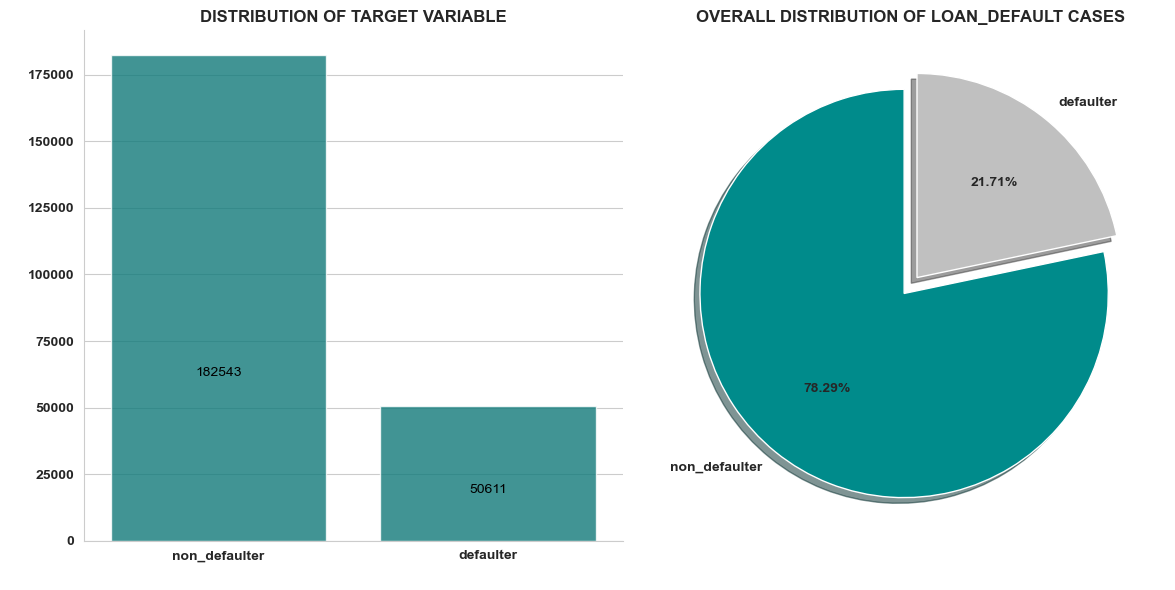

In [33]:
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')


plt.subplot(1, 2, 1)

bars = sns.countplot(x=df['loan_default'], color='darkcyan', edgecolor='white', alpha=0.8)

for i in bars.patches:
    height = i.get_height()
    x = i.get_x() + i.get_width() / 2
    plt.text(x, height / 3, int(height), ha='center', va='bottom', color='black')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.title('DISTRIBUTION OF TARGET VARIABLE', weight='bold')


plt.subplot(1, 2, 2)

plt.pie(df['loan_default'].value_counts(), labels=df['loan_default'].unique(), colors=['darkcyan', 'silver'],
        explode = [0.05] * len(df['loan_default'].unique()) ,
        autopct='%1.2f%%', shadow=True, startangle=90,
        wedgeprops={"edgecolor": 'white', "linewidth": 1},
       textprops = {'fontweight' : 'bold'})

plt.title('OVERALL DISTRIBUTION OF LOAN_DEFAULT CASES', weight='bold')

sns.despine()
plt.tight_layout()  
plt.show()

In [34]:
df['loan_default'].unique()

array(['non_defaulter', 'defaulter'], dtype=object)

In [35]:
df['loan_default'] = df['loan_default'].map({'non_defaulter':0,'defaulter':1})
df['loan_default'].unique()



array([0, 1], dtype=int64)

# 3.Study the distribution of the target variable across the various categories like branch, city, state, branch, supplier, manufacturer

In [36]:
df.head(2)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [37]:
df.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default'],
      dtype='object')

#  loan_default distribution 

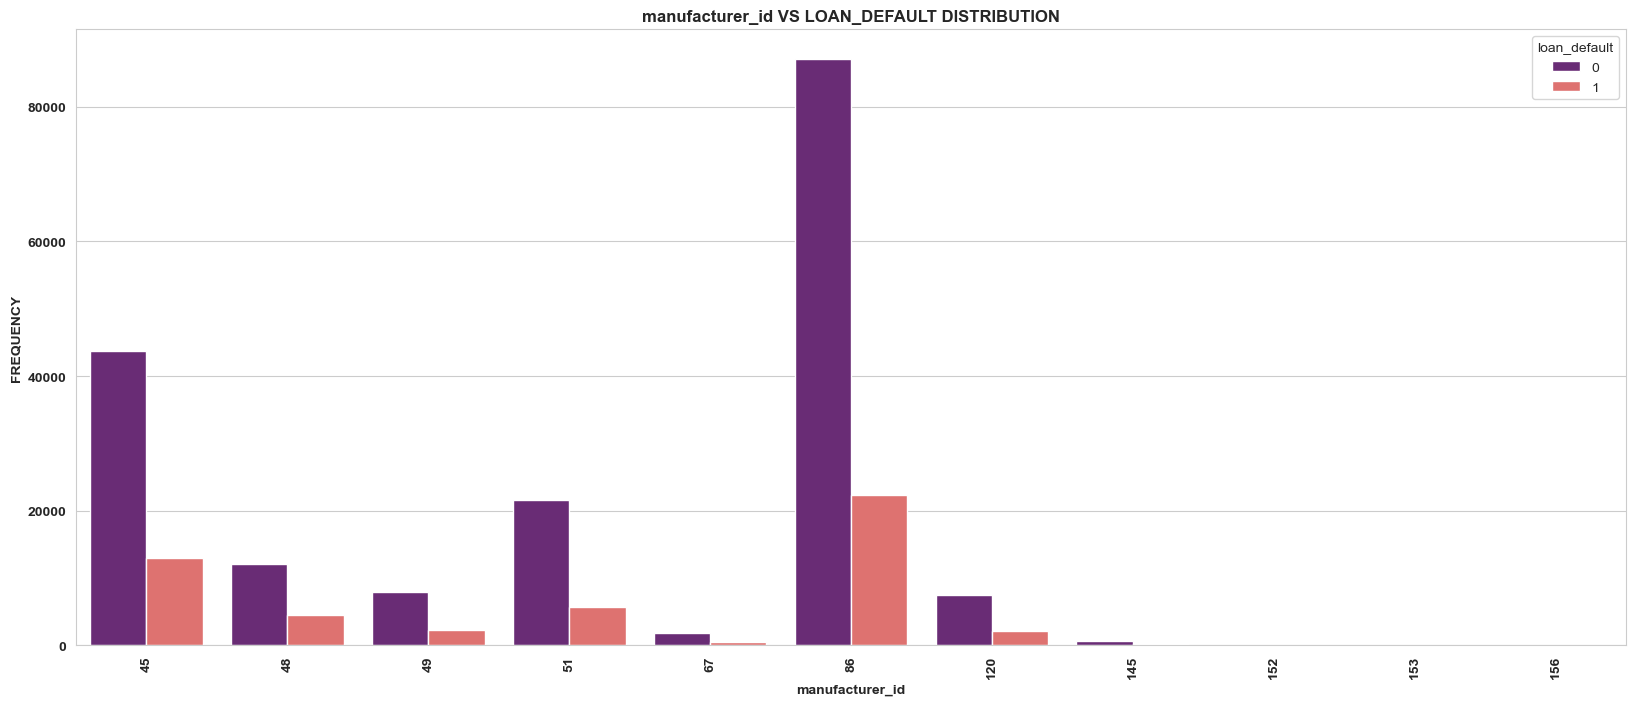

In [38]:
plt.figure(figsize = (20,8))
sns.countplot(x ='manufacturer_id',hue = 'loan_default',data = df,palette = 'magma')

plt.xlabel('manufacturer_id',weight = 'bold')
plt.ylabel('FREQUENCY',weight = 'bold')
plt.xticks(rotation = 90,weight = 'bold')
plt.yticks(weight = 'bold')
plt.title("manufacturer_id VS LOAN_DEFAULT DISTRIBUTION",weight = 'bold')
plt.show()

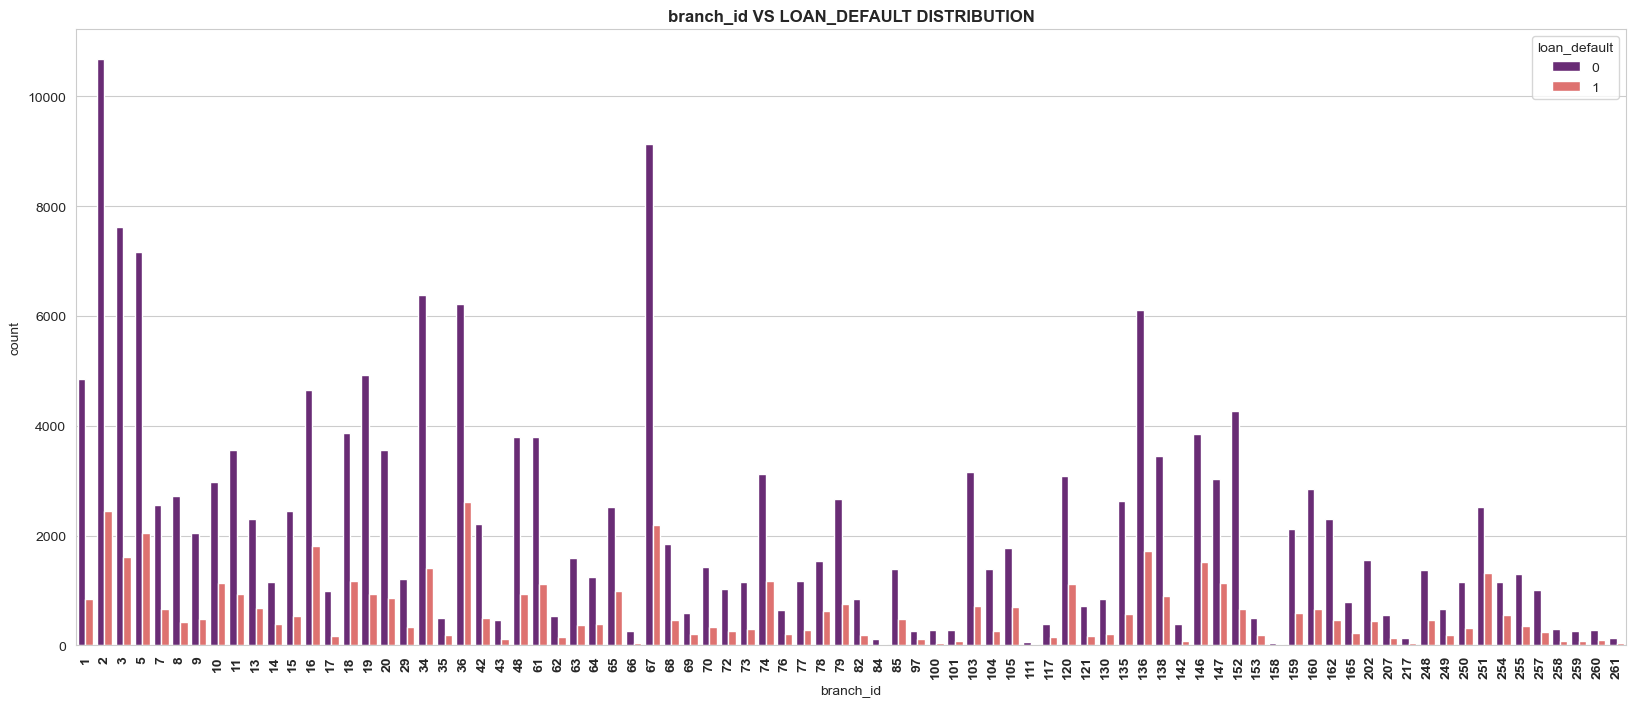

In [39]:
plt.figure(figsize = (20,8))
sns.countplot(x ='branch_id',hue = 'loan_default',data = df,palette = 'magma')
plt.xticks(rotation = 90,weight = 'bold')
plt.title("branch_id VS LOAN_DEFAULT DISTRIBUTION",weight = 'bold')
plt.show()

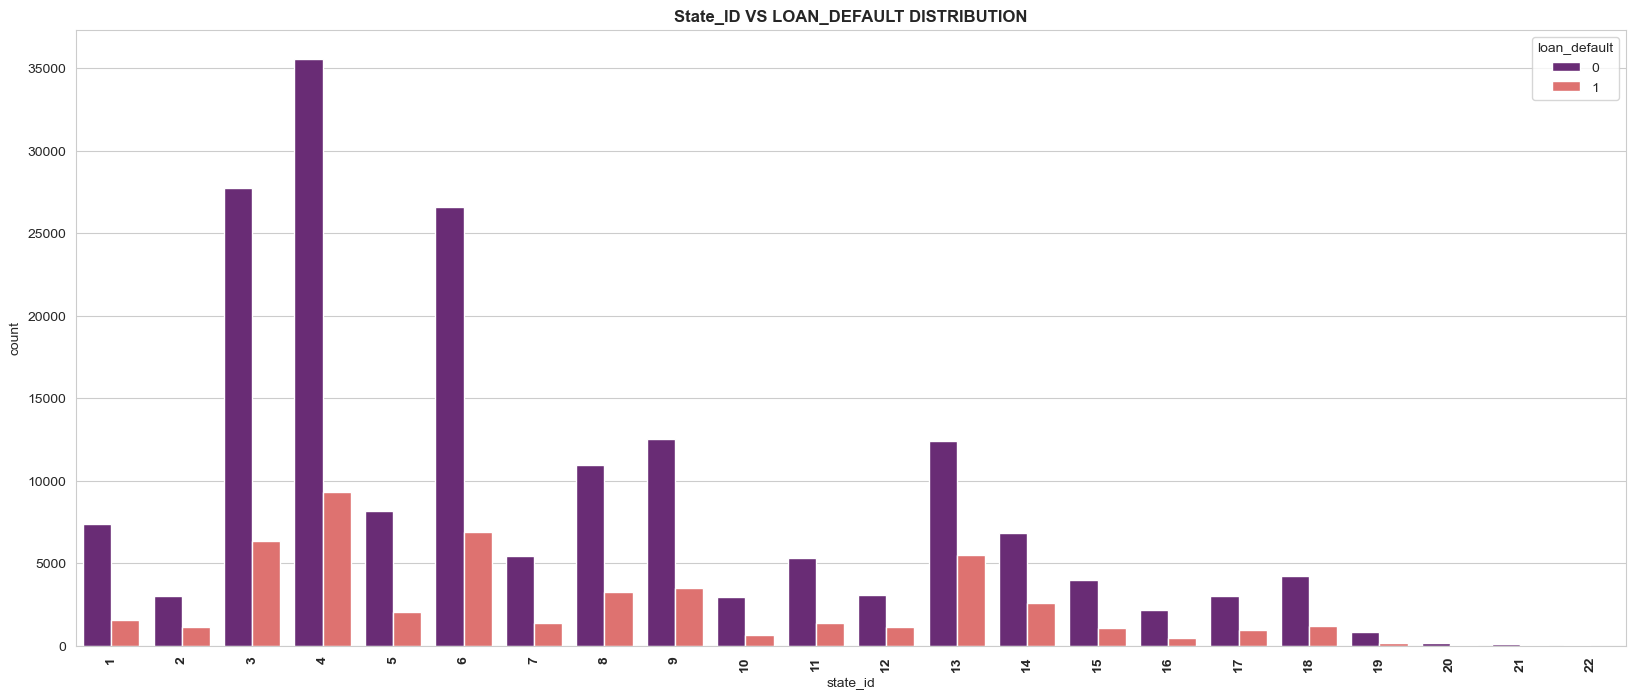

In [40]:
plt.figure(figsize = (20,8))
sns.countplot(x ='state_id',hue = 'loan_default',data = df,palette = 'magma')
plt.xticks(rotation = 90,weight = 'bold')
plt.title("State_ID VS LOAN_DEFAULT DISTRIBUTION",weight = 'bold')
plt.show()

In [41]:
# branch_id
df['supplier_id'].nunique()

2953

In [42]:
s_l_distribution = df.groupby(['supplier_id','loan_default'],as_index = False)['uniqueid'].count()
s_l_distribution.rename(columns = {'uniqueid':'frequency'},inplace = True)
s_l_distribution.sort_values(by = 'frequency',ascending = False,inplace = True)
s_l_distribution

,supplier_id,loan_default,frequency
1412,18166,0,1028
219,14375,0,988
1310,17980,0,983
565,15663,0,967
1496,18317,0,950
...,...,...,...
2211,21891,1,1
2199,21872,1,1
2198,21872,0,1
2187,21847,1,1


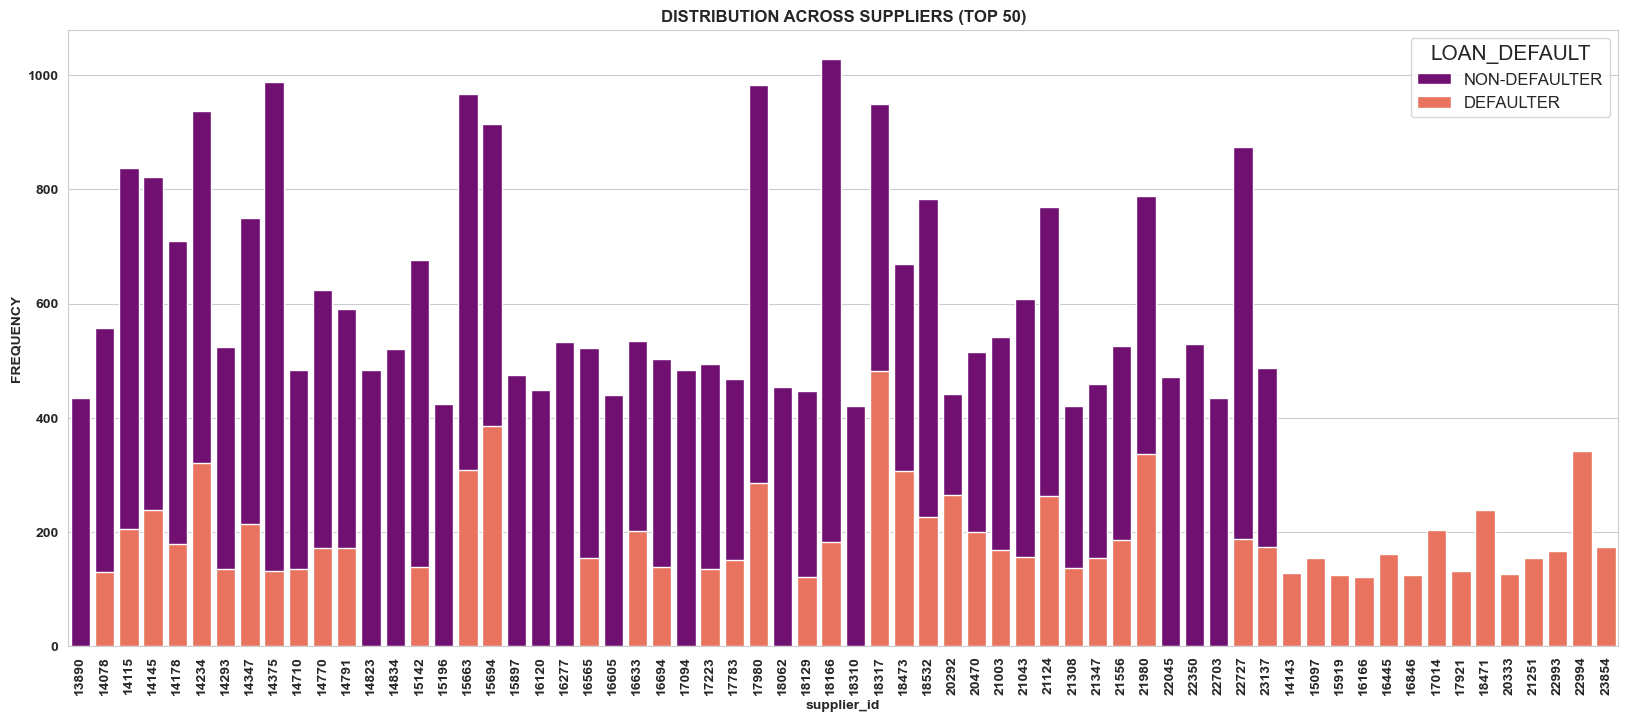

In [43]:
plt.figure(figsize = (20,8))

sns.barplot(x = 'supplier_id',
            y = 'frequency',
            data =s_l_distribution[s_l_distribution['loan_default']== 0].head(50),
            color = 'purple',
           label = 'NON-DEFAULTER')

sns.barplot(x = 'supplier_id',
            y = 'frequency',
            data =s_l_distribution[s_l_distribution['loan_default']== 1].head(50),
            color = 'tomato',
           label = 'DEFAULTER')


plt.xlabel('supplier_id',weight = 'bold')
plt.ylabel('FREQUENCY',weight = 'bold')
plt.xticks(rotation = 90,weight = 'bold')
plt.yticks(weight = 'bold')
plt.title('DISTRIBUTION ACROSS SUPPLIERS (TOP 50)',weight = 'bold')
plt.legend(title = 'LOAN_DEFAULT',title_fontsize = 15,loc = 'upper right',fontsize = 12)
plt.show()

# 4. What are the different employment types given in the data? Can a strategy be developed to fill in the missing values (if any)?  Use pie charts to express how different types of employment defines defaulter and non-defaulters.

In [44]:
df.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default'],
      dtype='object')

In [45]:
df['employment_type'].value_counts()

employment_type
Self employed    127635
Salaried          97858
unemployed         7661
Name: count, dtype: int64

In [46]:
# employee_type distribution dataframe

pct_e_type = pd.DataFrame(df['employment_type'].value_counts())
pct_e_type= pct_e_type.reset_index()

pct_e_type['pct'] = 0.0
total = sum(pct_e_type['count'])

for i,r in pct_e_type.iterrows():
    pct_e_type.at[i,'pct'] = round((r['count']/total*100),2)
pct_e_type

,employment_type,count,pct
0,Self employed,127635,54.74
1,Salaried,97858,41.97
2,unemployed,7661,3.29


In [47]:
l_d_percentage = df.groupby(['employment_type','loan_default'],as_index = False)['uniqueid'].count()
l_d_percentage['group_total'] = l_d_percentage.groupby('employment_type')['uniqueid'].transform('sum')
l_d_percentage['pct'] = round(l_d_percentage['uniqueid']/l_d_percentage['group_total']*100,2)

# mapping (loan_default to categorical_value)
#l_d_percentage['loan_default'] = l_d_percentage['loan_default'].map({0:'DEFAULTER',1:'NON-DEFAULTER'})

l_d_percentage


,employment_type,loan_default,uniqueid,group_total,pct
0,Salaried,0,77948,97858,79.65
1,Salaried,1,19910,97858,20.35
2,Self employed,0,98578,127635,77.23
3,Self employed,1,29057,127635,22.77
4,unemployed,0,6017,7661,78.54
5,unemployed,1,1644,7661,21.46


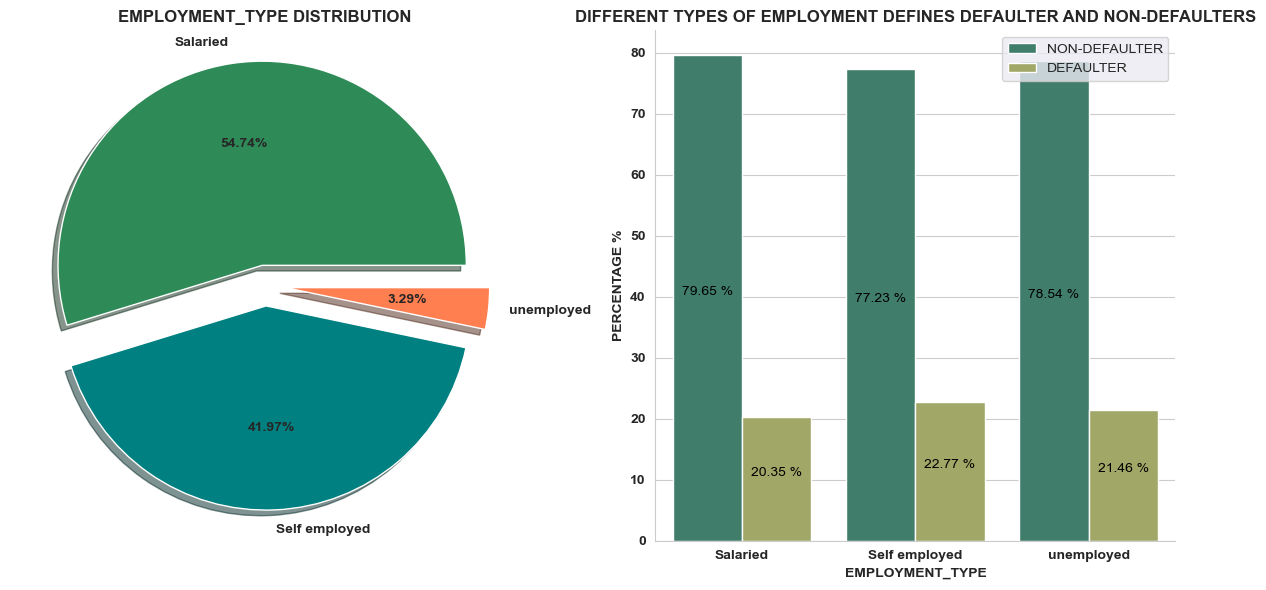

In [48]:
# pie chart for employee_type distribution
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
colors = ['seagreen','teal','coral']
labels = df['employment_type'].unique()
plt.pie(df['employment_type'].value_counts(),autopct = '%1.2f%%',
       labels = labels,
       colors = colors,
        explode = [0.1]*len(labels),
       startangle = 0,
        shadow = True,
        textprops = {'fontweight':'bold'},
        wedgeprops = {'edgecolor': 'w',
                     'linewidth':1}
       )


plt.title("EMPLOYMENT_TYPE DISTRIBUTION",weight = 'bold')


# distribution of loan_default percentage over different employment status
plt.subplot(1,2,2)

l_d_percentage = df.groupby(['employment_type','loan_default'],as_index = False)['uniqueid'].count()
l_d_percentage['group_total'] = l_d_percentage.groupby('employment_type')['uniqueid'].transform('sum')
l_d_percentage['pct'] = round(l_d_percentage['uniqueid']/l_d_percentage['group_total']*100,2)

# mapping (loan_default to categorical_value)
l_d_percentage['loan_default'] = l_d_percentage['loan_default'].map({1:'DEFAULTER',0:'NON-DEFAULTER'})

# plotting
sns.set_style('darkgrid')
bars = sns.barplot(x ='employment_type',
                   y= 'pct',hue ='loan_default',
                   data = l_d_percentage,
                   palette = 'gist_earth',
                   edgecolor= 'white' )

for i in bars.patches:
    height = i.get_height()
    if height != 0:
        
        x = i.get_x() + i.get_width()/2
        plt.text(x,height/2,str(height)+str(' %'),ha ='center',va = 'bottom',color = 'black')

plt.xlabel('EMPLOYMENT_TYPE',weight = 'bold')
plt.ylabel('PERCENTAGE %',weight = 'bold')
plt.xticks(weight = 'bold')
plt.yticks(weight ='bold')
plt.title('DIFFERENT TYPES OF EMPLOYMENT DEFINES DEFAULTER AND NON-DEFAULTERS',weight = 'bold')
plt.legend(loc = 'best')



sns.despine()
plt.tight_layout()
plt.show()



In [49]:
df['employment_type'] = df['employment_type'].astype('category')
df['employment_type'] =df['employment_type'].cat.codes
df['employment_type'].unique()

array([0, 1, 2], dtype=int8)

# 5.Has age got something to do with defaulting? What is the distribution of age w.r.t. to defaulters and non-defaulters?

In [50]:
df.head(2)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [51]:
df['disbursal_age'] = df['disbursaldate'].dt.year-df['date_of_birth'].dt.year 
df.head(2)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,disbursal_age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33


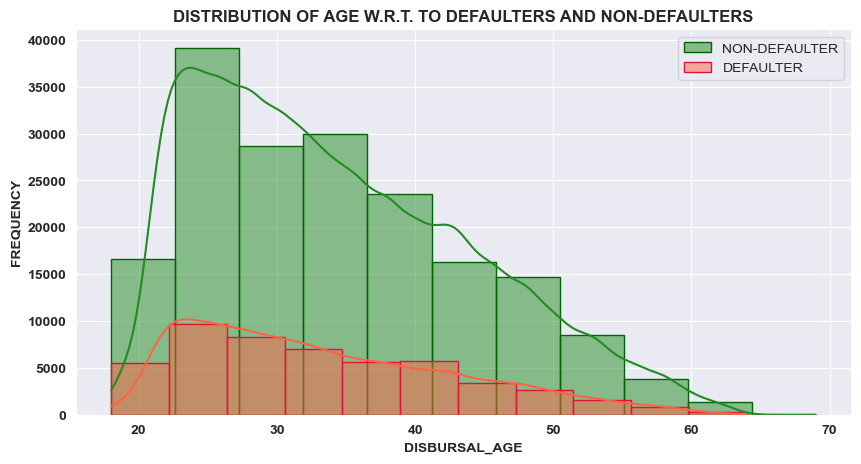

In [52]:
#plotting
plt.figure(figsize = (10,5))
sns.set_style('darkgrid')

sns.histplot(x ='disbursal_age',data = df[df['loan_default']==0] ,bins = 11,kde =True,color = 'forestgreen',
             label = 'NON-defaulter'.upper(),edgecolor = 'darkgreen')
sns.histplot(x ='disbursal_age',data = df[df['loan_default']==1] ,bins = 11,kde =True,color = 'tomato',
             label = 'defaulter'.upper(),edgecolor = 'crimson')


plt.xlabel('disbursal_age'.upper(),weight = 'bold')
plt.ylabel('FREQUENCY',weight = 'bold')
plt.xticks(weight ='bold')
plt.yticks(weight = 'bold')
plt.title('distribution of age w.r.t. to defaulters and non-defaulters'.upper(),weight = 'bold')
plt.legend(loc = 'best')

sns.despine()
plt.show()

# 6. What type of ID is presented by most of the customers as proofs?

In [53]:
df.head(2)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,disbursal_age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33


In [54]:
id_flags = ['aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag']

# Calculate the total count for each ID flag
id_counts = df[id_flags].sum()
id_cnt = pd.DataFrame({'ID': id_counts.index,'CNT':id_counts.values})
id_cnt

,ID,CNT
0,aadhar_flag,195924
1,pan_flag,17621
2,voterid_flag,33794
3,driving_flag,5419
4,passport_flag,496


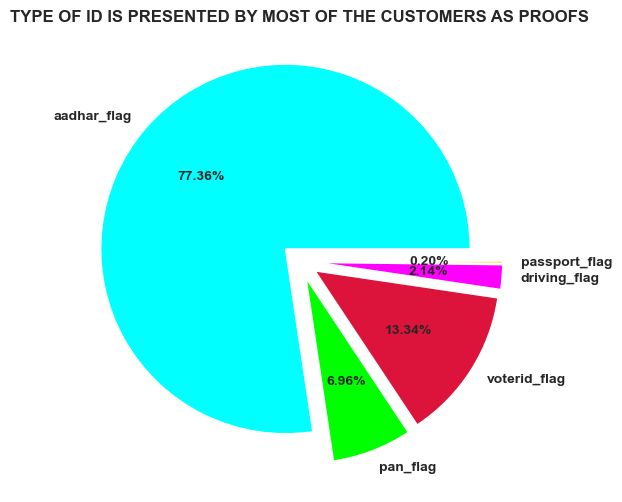

In [55]:
plt.figure(figsize =(8,6))
plt.pie(x = 'CNT',data = id_cnt,
        autopct = "%1.2f%%",
        shadow = False, 
        explode = [0.1]*len(id_cnt['ID'].values),
        colors = ['cyan','lime','crimson','magenta','gold'],
       labels = id_cnt['ID'].values,
       startangle = 0,
       textprops = {'fontweight':'bold'},
       wedgeprops = {'linewidth':1,
                    'edgecolor':'w'})

plt.title("type of ID is presented by most of the customers as proofs".upper(),weight = 'bold')
plt.show()

# Performing EDA and Modeling:

# Study the credit bureau score distribution. How is the distribution for defaulters vs. non-defaulters? Explore in detail.

In [56]:
df.head(2)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,disbursal_age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33


In [57]:
df['perform_cns_score_description'].unique()

array(['No Bureau History Available', 'A-Very Low Risk',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk',
       'E-Low Risk', 'F-Low Risk', 'G-Low Risk', 'H-Medium Risk',
       'I-Medium Risk', 'J-High Risk', 'K-High Risk', 'L-Very High Risk',
       'M-Very High Risk',
       'Not Scored: No Updates available in last 36 months',
       'Not Scored: Not Enough Info available on the customer',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [58]:
df['perform_cns_score'].describe()

count    233154.000000
mean        289.462994
std         338.374779
min           0.000000
25%           0.000000
50%           0.000000
75%         678.000000
max         890.000000
Name: perform_cns_score, dtype: float64

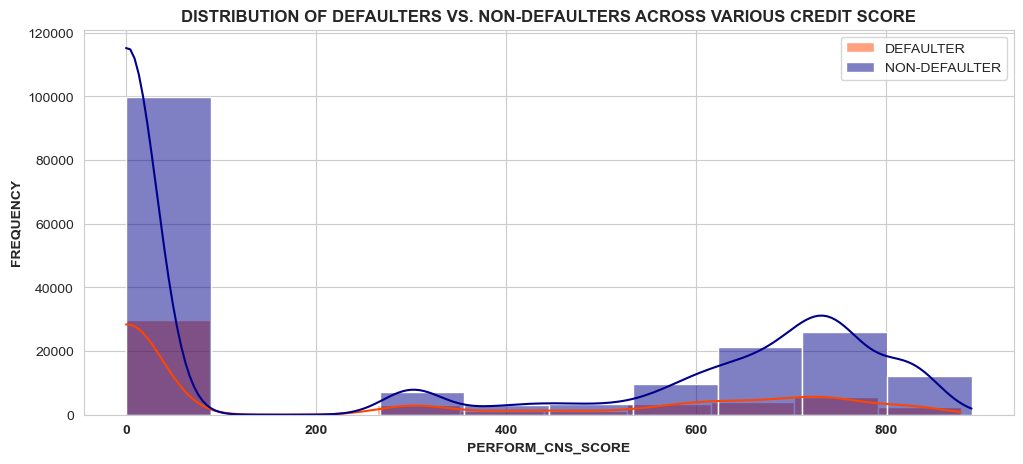

In [62]:
plt.figure(figsize = (12,5))
sns.set_style('whitegrid')


sns.histplot(x ='perform_cns_score',data = df[df['loan_default']==1],bins = 10,color = 'orangered',kde = True,label = 'DEFAULTER' )
sns.histplot(x ='perform_cns_score',data = df[df['loan_default']==0],bins = 10,color = 'darkblue',kde = True,label = 'NON-DEFAULTER' )


plt.xlabel('perform_cns_score'.upper(),weight = 'bold')
plt.ylabel('frequency'.upper(),weight='bold')
plt.xticks(weight ='bold')
plt.xticks(weight ='bold')
plt.title('distribution of defaulters vs. non-defaulters across various credit score'.upper(),weight = 'bold')
plt.legend(loc = 'best')


plt.show()




### For both the defaluters and non Defaulters the distribution of CNS score follow a similar distribution

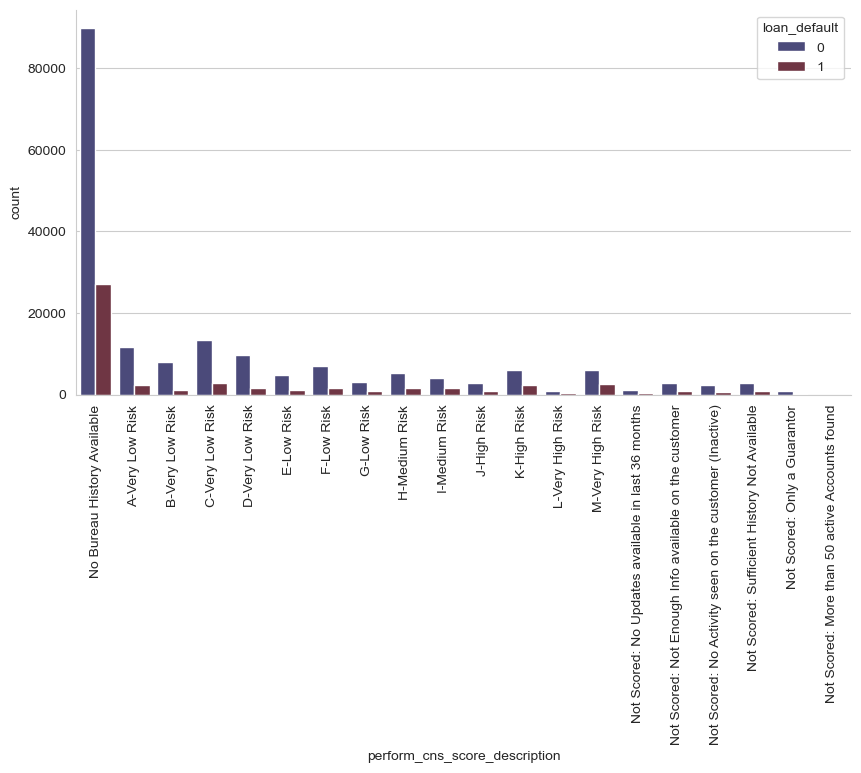

In [63]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['perform_cns_score_description'],hue = 'loan_default',data = df,palette = 'icefire')


plt.xticks(rotation = 90)
sns.despine()
plt.show()

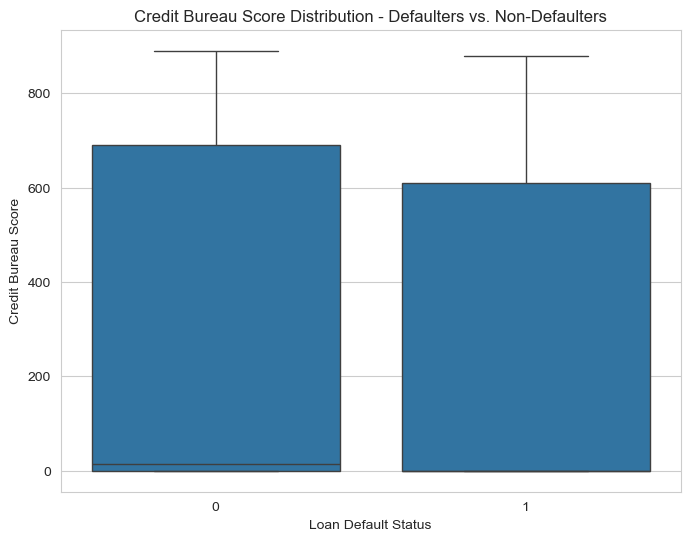

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_default', y='perform_cns_score', data=df)
plt.title('Credit Bureau Score Distribution - Defaulters vs. Non-Defaulters')
plt.xlabel('Loan Default Status')
plt.ylabel('Credit Bureau Score')
plt.show()

# Explore the primary and secondary account details. Is the information in some way related to the loan default probability?

In [65]:
df.head(2)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,disbursal_age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33


In [66]:
# Assuming your DataFrame is named df
primary_cols = ['pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount']
secondary_cols = ['sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount']

# Summary statistics
print("Primary Account Details:")
print([df[primary_cols].describe().astype(np.float64)])

print("\nSecondary Account Details:")
print([df[secondary_cols].describe().astype(np.float64)])


Primary Account Details:
[       pri_no_of_accts  pri_active_accts  pri_overdue_accts  \
count    233154.000000     233154.000000      233154.000000   
mean          2.440636          1.039896           0.156549   
std           5.217233          1.941496           0.548787   
min           0.000000          0.000000           0.000000   
25%           0.000000          0.000000           0.000000   
50%           0.000000          0.000000           0.000000   
75%           3.000000          1.000000           0.000000   
max         453.000000        144.000000          25.000000   

       pri_current_balance  pri_sanctioned_amount  pri_disbursed_amount  
count         2.331540e+05           2.331540e+05          2.331540e+05  
mean          1.659001e+05           2.185039e+05          2.180659e+05  
std           9.422736e+05           2.374794e+06          2.377744e+06  
min          -6.678296e+06           0.000000e+00          0.000000e+00  
25%           0.000000e+00          

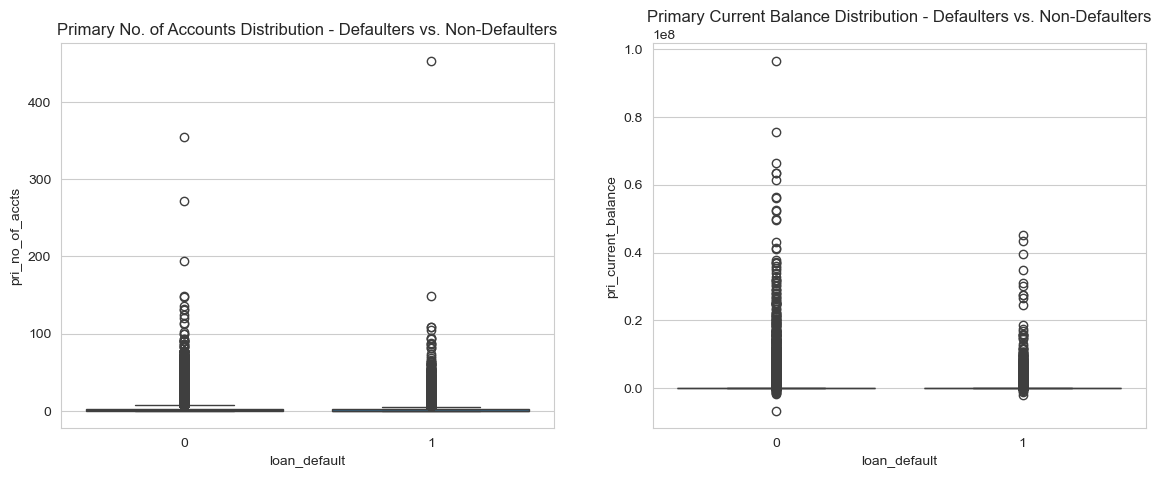

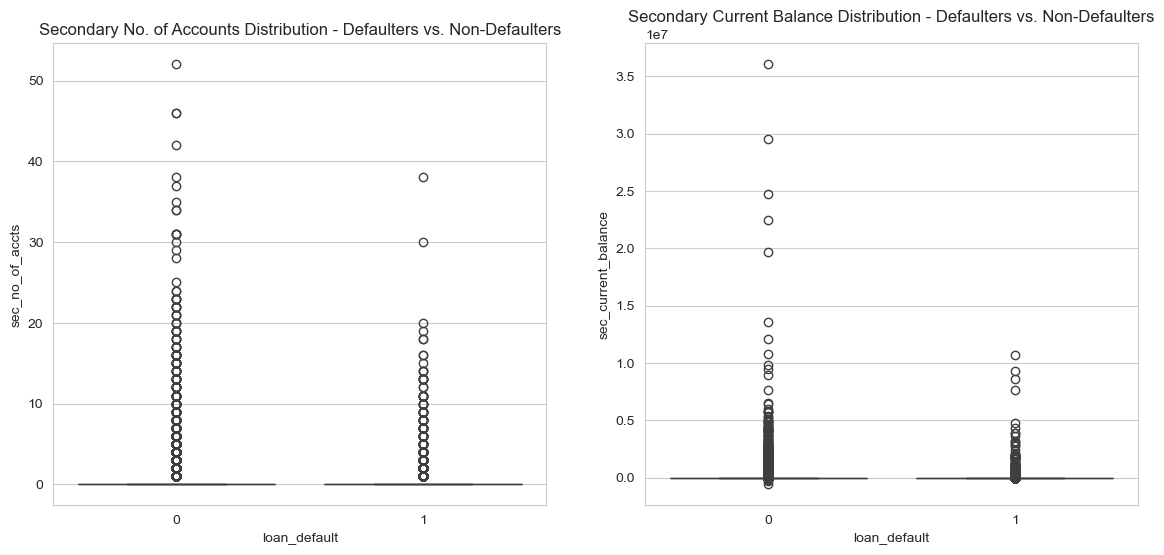

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for primary account details
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_default', y='pri_no_of_accts', data=df)
plt.title('Primary No. of Accounts Distribution - Defaulters vs. Non-Defaulters')

plt.subplot(1, 2, 2)
sns.boxplot(x='loan_default', y='pri_current_balance', data=df)
plt.title('Primary Current Balance Distribution - Defaulters vs. Non-Defaulters')

# Box plots for secondary account details
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_default', y='sec_no_of_accts', data=df)
plt.title('Secondary No. of Accounts Distribution - Defaulters vs. Non-Defaulters')

plt.subplot(1, 2, 2)
sns.boxplot(x='loan_default', y='sec_current_balance', data=df)
plt.title('Secondary Current Balance Distribution - Defaulters vs. Non-Defaulters')

plt.show()


### Primary Number of Accounts: Defaulters generally have more total accounts than non-defaulters.”

### Primary Current Balance: Defaulters generally have a lower primary current balance than non-defaulters”

### Secondary Number of Accounts: Similar to the total number of accounts, defaulters generally have more secondary accounts than non-defaulters.”

### Secondary Current Balance: Defaulters typically have a lower secondary current balance than those who do not default.”

### In conclusion, the graphs suggest that defaulters tend to have a higher number of accounts and a lower current balance compared to non-defaulters. This information could be useful for financial institutions when assessing the risk of loan default. However, it’s important to note that correlation does not imply causation, and these factors should be considered as part of a broader risk assessment strategy.

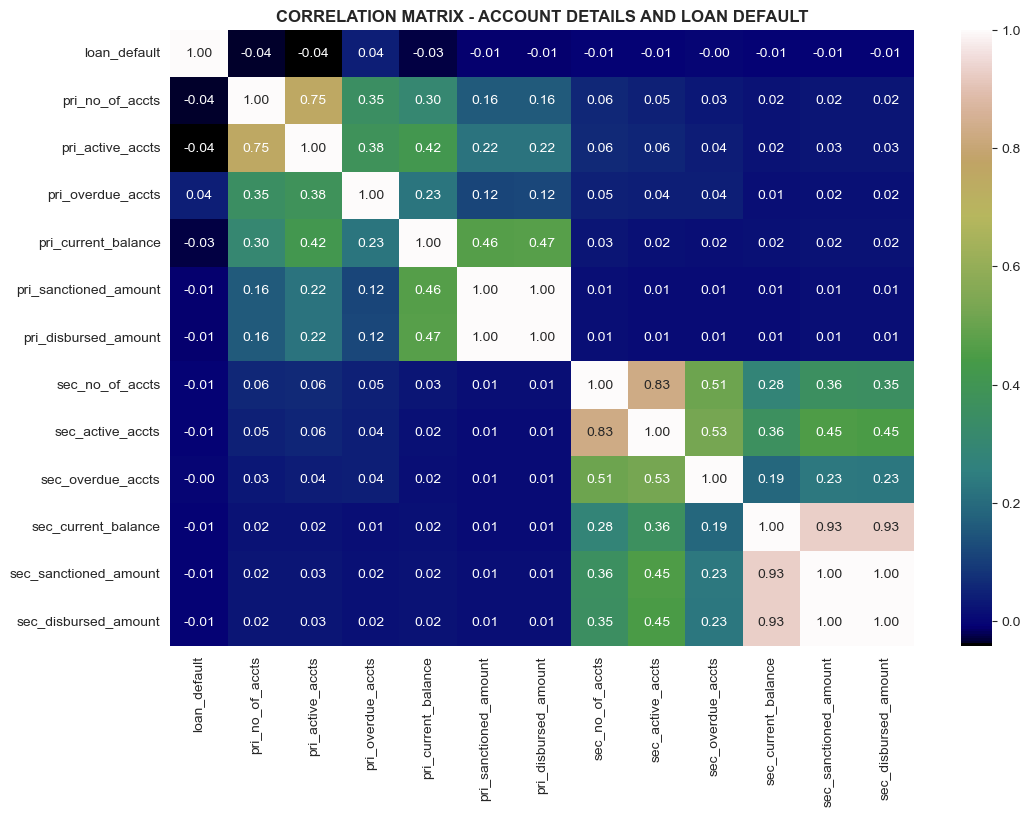

In [68]:
# Assuming your DataFrame is named df
account_details = df[['loan_default'] + primary_cols + secondary_cols]

# Calculate correlation matrix
correlation_matrix = account_details.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='gist_earth', fmt='.2f')
plt.title('Correlation Matrix - Account Details and Loan Default'.upper(),weight = 'bold')
plt.show()


### Primary Overdue Accounts (pri_overdue_accts): This variable shows a positive correlation with loan default. This suggests that customers with a higher number of primary overdue accounts are more likely to default on their loans.

### Secondary Overdue Accounts (sec_overdue_accts): Similar to primary overdue accounts, secondary overdue accounts also show a positive correlation with loan default. This indicates that customers with more secondary overdue accounts are more likely to default.

### Primary Number of Accounts (pri_no_of_accts), Primary Active Accounts (pri_active_accts), and others: These variables show a weak negative correlation with loan default. This suggests that as these variables increase, the likelihood of loan default might decrease slightly. However, the correlation is weak, so these variables are not strong predictors of loan default.

# Is there a difference between the sanctioned and disbursed amount of primary and secondary loans? Study the difference by providing appropriate statistics and graphs.

In [69]:
df.head(2)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,disbursal_age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33


In [70]:
pri_col = ['pri_sanctioned_amount','pri_disbursed_amount']
sec_col = ['sec_sanctioned_amount','sec_disbursed_amount']

In [74]:
print(df[pri_col].describe().astype(np.int64))

       pri_sanctioned_amount  pri_disbursed_amount
count                 233154                233154
mean                  218503                218065
std                  2374794               2377743
min                        0                     0
25%                        0                     0
50%                        0                     0
75%                    62500                 60800
max               1000000000            1000000000


### Mean:The mean (average) value for both pri_sanctioned_amount and pri_disbursed_amount is relatively high, indicating that, on average, the sanctioned and disbursed amounts are substantial.

### Standard Deviation:The standard deviation (measure of the amount of variation or dispersion) is very large for both pri_sanctioned_amount and pri_disbursed_amount. This suggests that there is a wide range of values in the dataset, and the amounts vary significantly from the mean.

### Minimum and Maximum:The minimum values for both pri_sanctioned_amount and pri_disbursed_amount are 0, which implies that there are cases where the loan amount is either not sanctioned or not disbursed.

### The maximum values for both columns are very high (1 billion), indicating that there are cases with extremely large sanctioned and disbursed amounts.
### Quartiles (25%, 50%, 75%):The quartile values provide insights into the distribution of the data.

### For both pri_sanctioned_amount and pri_disbursed_amount, the majority of the values (up to 75%) fall within relatively lower ranges, as indicated by the 25th, 50th, and 75th percentiles.

In [75]:
print(df[sec_col].describe().astype(np.int64))

       sec_sanctioned_amount  sec_disbursed_amount
count                 233154                233154
mean                    7295                  7179
std                   183155                182592
min                        0                     0
25%                        0                     0
50%                        0                     0
75%                        0                     0
max                 30000000              30000000


### Mean:The mean (average) values for both sec_sanctioned_amount and sec_disbursed_amount are relatively low compared to the primary loan amounts, indicating that, on average, the secondary loan amounts are smaller.

### Standard Deviation:The standard deviation (measure of the amount of variation or dispersion) is very large for both sec_sanctioned_amount and sec_disbursed_amount. This suggests that there is a wide range of values in the dataset, and the amounts vary significantly from the mean.

### Minimum and Maximum:The minimum values for both sec_sanctioned_amount and sec_disbursed_amount are 0, indicating cases where the secondary loan amount is either not sanctioned or not disbursed.

### The maximum values for both columns are relatively high (30 million), suggesting that there are cases with relatively large secondary sanctioned and disbursed amounts.

### Quartiles (25%, 50%, 75%):The quartile values indicate that the majority of the values (up to 75%) fall within the lower range (0), as indicated by the 25th, 50th, and 75th percentiles.

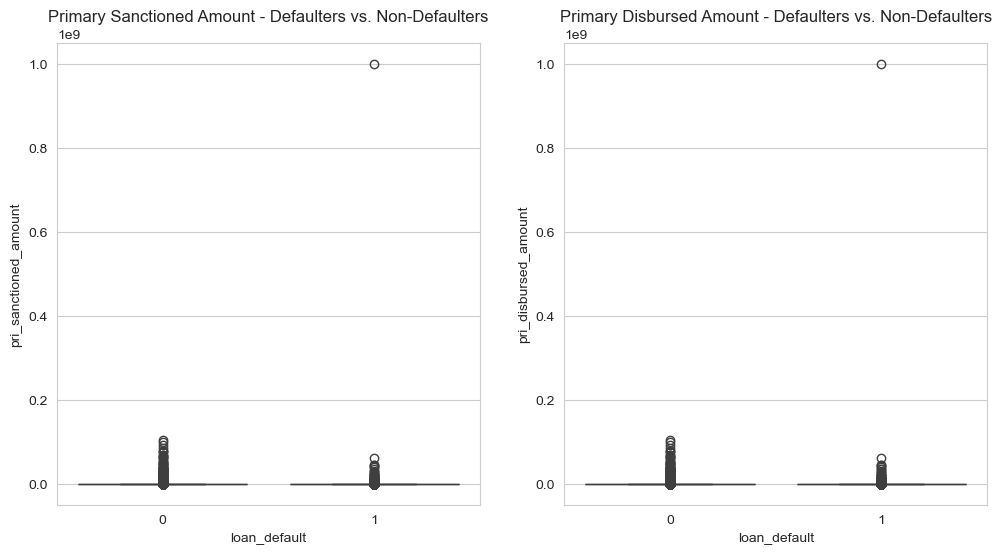

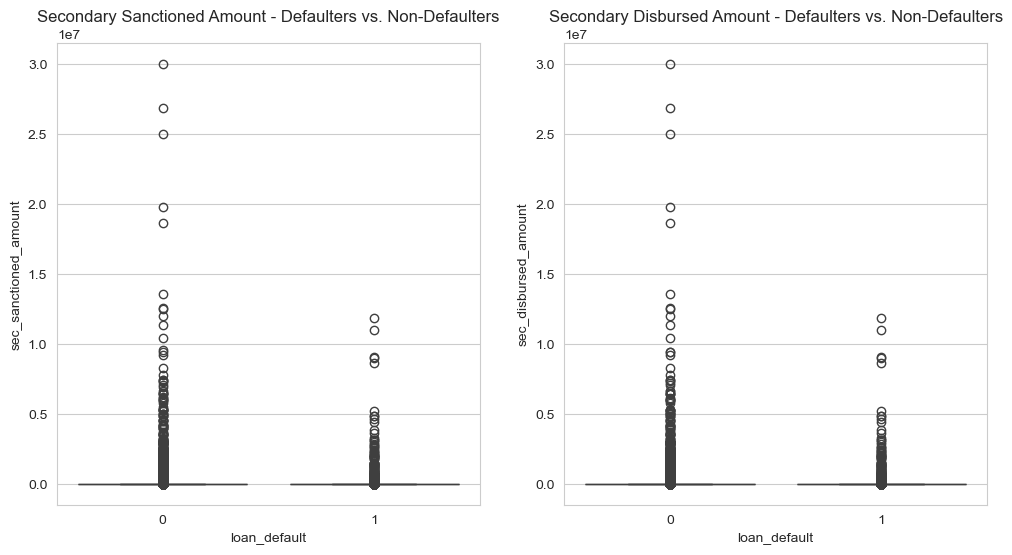

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for primary loan amounts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='pri_sanctioned_amount', x='loan_default')
plt.title('Primary Sanctioned Amount - Defaulters vs. Non-Defaulters')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='pri_disbursed_amount', x='loan_default')
plt.title('Primary Disbursed Amount - Defaulters vs. Non-Defaulters')

# Box plots for secondary loan amounts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='sec_sanctioned_amount', x='loan_default')
plt.title('Secondary Sanctioned Amount - Defaulters vs. Non-Defaulters')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='sec_disbursed_amount', x='loan_default')
plt.title('Secondary Disbursed Amount - Defaulters vs. Non-Defaulters')

plt.show()


In [90]:
df.head(2)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,disbursal_age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33


# Do customers who make higher numbers of inquiries end up being higher risk candidates?

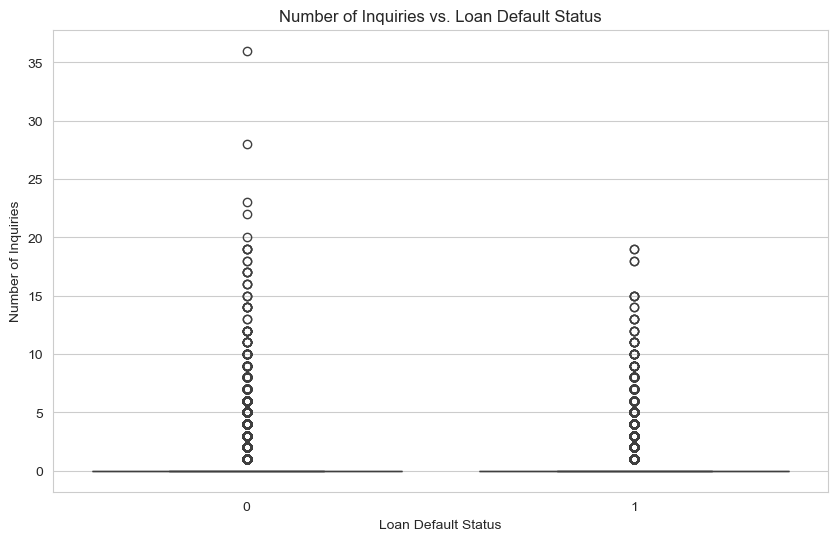

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.figure(figsize=(10, 6))

# Box plot for number of inquiries vs. loan default status
sns.boxplot(x='loan_default', y='no_of_inquiries', data=df)
plt.title('Number of Inquiries vs. Loan Default Status')
plt.xlabel('Loan Default Status')
plt.ylabel('Number of Inquiries')

plt.show()


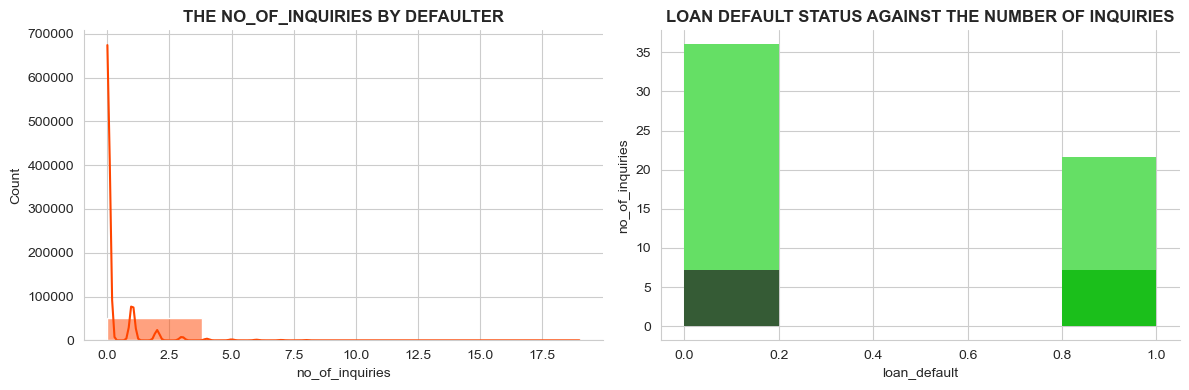

In [100]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.histplot(x = 'no_of_inquiries',data = df[df['loan_default']== 1] ,bins = 5,kde =True,color = 'orangered')
plt.title('the no_of_inquiries by defaulter'.upper(),weight = 'bold')
plt.subplot(1,2,2)
sns.histplot(x = 'loan_default',y = 'no_of_inquiries',data = df ,bins = 5,kde =True,color = 'darkgreen')
plt.title('loan default status against the number of inquiries'.upper(),weight ='bold')
sns.despine()
plt.tight_layout()
plt.show()


### The left graph shows the count of individuals against the number of inquiries they have made. It peaks sharply at 0 inquiries and then decreases dramatically as the number of inquiries increases.

### The right graph shows the loan default status against the number of inquiries. It displays two bars: one for loan_default value at approximately 0.2 (indicating no default, represented in green) and another at approximately 1.0 (indicating default, represented in dark color).

### From these graphs, it can be inferred that as the number of inquiries increases, the risk of loan default also increases

In [95]:
corr = df[['loan_default','no_of_inquiries']].corr(method = 'pearson')
corr

,loan_default,no_of_inquiries
loan_default,1.000000,0.043678
no_of_inquiries,0.043678,1.000000


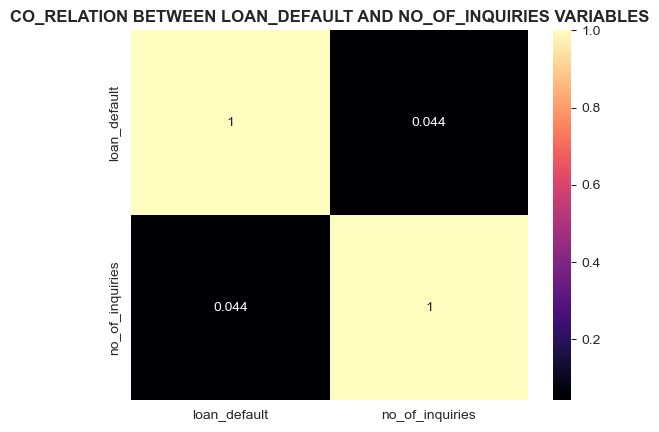

In [97]:
sns.heatmap(corr,annot = True,cmap = 'magma')
plt.title('co_relation between loan_default and no_of_inquiries variables'.upper(),weight = 'bold')
plt.show()

### This suggests that there is a slight positive correlation between the number of inquiries and loan default, but it’s relatively low (0.044). This means that while the number of inquiries can have an impact on loan default, it’s not a strong predictor on its own. Other factors likely play a significant role as well.

# Is credit history, that is, new loans in the last six months, loans defaulted in the last six months, time since the first loan, etc., a significant factor in estimating the probability of loan defaulters?

In [101]:
df.head(2)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,disbursal_age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33


# df2['average_acct_age'] converting into month format (y *12 + m)

In [230]:
df2 = df.copy()

In [231]:
df2['average_acct_age'].unique()

array(['0yrs 0mon', '5yrs 0mon', '1yrs 9mon', '1yrs 11mon', '0yrs 8mon',
       '1yrs 0mon', '1yrs 1mon', '1yrs 6mon', '5yrs 9mon', '0yrs 3mon',
       '4yrs 8mon', '0yrs 4mon', '0yrs 2mon', '0yrs 11mon', '2yrs 11mon',
       '2yrs 3mon', '8yrs 0mon', '3yrs 6mon', '8yrs 1mon', '1yrs 3mon',
       '3yrs 1mon', '3yrs 3mon', '3yrs 4mon', '0yrs 9mon', '0yrs 10mon',
       '2yrs 1mon', '2yrs 9mon', '1yrs 10mon', '4yrs 1mon', '0yrs 6mon',
       '11yrs 8mon', '2yrs 0mon', '0yrs 7mon', '8yrs 9mon', '10yrs 1mon',
       '6yrs 2mon', '2yrs 2mon', '7yrs 11mon', '10yrs 11mon', '0yrs 5mon',
       '3yrs 7mon', '2yrs 8mon', '1yrs 8mon', '5yrs 2mon', '7yrs 8mon',
       '1yrs 5mon', '2yrs 7mon', '14yrs 7mon', '10yrs 8mon', '1yrs 7mon',
       '3yrs 5mon', '6yrs 6mon', '9yrs 6mon', '11yrs 0mon', '3yrs 2mon',
       '3yrs 9mon', '5yrs 1mon', '3yrs 8mon', '7yrs 2mon', '1yrs 4mon',
       '4yrs 4mon', '5yrs 3mon', '6yrs 3mon', '8yrs 7mon', '1yrs 2mon',
       '4yrs 7mon', '0yrs 1mon', '8yrs 3mon', '2yrs

In [232]:
df2['average_acct_age'].dtype

dtype('O')

In [233]:
df2['average_acct_age']= df2['average_acct_age'].str.replace('[yrsmon]','',regex = True)
df2['average_acct_age'].unique()

array(['0 0', '5 0', '1 9', '1 11', '0 8', '1 0', '1 1', '1 6', '5 9',
       '0 3', '4 8', '0 4', '0 2', '0 11', '2 11', '2 3', '8 0', '3 6',
       '8 1', '1 3', '3 1', '3 3', '3 4', '0 9', '0 10', '2 1', '2 9',
       '1 10', '4 1', '0 6', '11 8', '2 0', '0 7', '8 9', '10 1', '6 2',
       '2 2', '7 11', '10 11', '0 5', '3 7', '2 8', '1 8', '5 2', '7 8',
       '1 5', '2 7', '14 7', '10 8', '1 7', '3 5', '6 6', '9 6', '11 0',
       '3 2', '3 9', '5 1', '3 8', '7 2', '1 4', '4 4', '5 3', '6 3',
       '8 7', '1 2', '4 7', '0 1', '8 3', '2 5', '5 5', '4 0', '10 2',
       '12 6', '3 10', '6 0', '11 10', '13 5', '7 5', '8 5', '5 11',
       '2 6', '5 7', '5 10', '2 10', '2 4', '4 9', '9 11', '4 6', '3 0',
       '8 6', '9 9', '7 4', '5 8', '7 0', '9 5', '15 5', '5 4', '7 6',
       '13 6', '13 11', '8 2', '10 6', '4 2', '9 7', '17 10', '10 3',
       '12 3', '7 1', '6 8', '4 11', '6 5', '10 9', '11 2', '6 9', '14 0',
       '12 1', '11 3', '11 7', '4 5', '8 11', '10 0', '10 10', '12 4

In [234]:
df2['average_acct_age']= df2['average_acct_age'].str.replace(' ',',',regex = True)
df2['average_acct_age'].unique()

array(['0,0', '5,0', '1,9', '1,11', '0,8', '1,0', '1,1', '1,6', '5,9',
       '0,3', '4,8', '0,4', '0,2', '0,11', '2,11', '2,3', '8,0', '3,6',
       '8,1', '1,3', '3,1', '3,3', '3,4', '0,9', '0,10', '2,1', '2,9',
       '1,10', '4,1', '0,6', '11,8', '2,0', '0,7', '8,9', '10,1', '6,2',
       '2,2', '7,11', '10,11', '0,5', '3,7', '2,8', '1,8', '5,2', '7,8',
       '1,5', '2,7', '14,7', '10,8', '1,7', '3,5', '6,6', '9,6', '11,0',
       '3,2', '3,9', '5,1', '3,8', '7,2', '1,4', '4,4', '5,3', '6,3',
       '8,7', '1,2', '4,7', '0,1', '8,3', '2,5', '5,5', '4,0', '10,2',
       '12,6', '3,10', '6,0', '11,10', '13,5', '7,5', '8,5', '5,11',
       '2,6', '5,7', '5,10', '2,10', '2,4', '4,9', '9,11', '4,6', '3,0',
       '8,6', '9,9', '7,4', '5,8', '7,0', '9,5', '15,5', '5,4', '7,6',
       '13,6', '13,11', '8,2', '10,6', '4,2', '9,7', '17,10', '10,3',
       '12,3', '7,1', '6,8', '4,11', '6,5', '10,9', '11,2', '6,9', '14,0',
       '12,1', '11,3', '11,7', '4,5', '8,11', '10,0', '10,10', '12,4

In [235]:
df2['average_acct_age'] = df2['average_acct_age'].apply(lambda x : int(x.split(',')[0])*12 + int(x.split(',')[1]))
df2['average_acct_age'].unique()  

array([  0,  60,  21,  23,   8,  12,  13,  18,  69,   3,  56,   4,   2,
        11,  35,  27,  96,  42,  97,  15,  37,  39,  40,   9,  10,  25,
        33,  22,  49,   6, 140,  24,   7, 105, 121,  74,  26,  95, 131,
         5,  43,  32,  20,  62,  92,  17,  31, 175, 128,  19,  41,  78,
       114, 132,  38,  45,  61,  44,  86,  16,  52,  63,  75, 103,  14,
        55,   1,  99,  29,  65,  48, 122, 150,  46,  72, 142, 161,  89,
       101,  71,  30,  67,  70,  34,  28,  57, 119,  54,  36, 102, 117,
        88,  68,  84, 113, 185,  64,  90, 162, 167,  98, 126,  50, 115,
       214, 123, 147,  85,  80,  59,  77, 129, 134,  81, 168, 145, 135,
       139,  53, 107, 120, 130, 148, 133, 118,  82, 199,  58,  51, 157,
        87,  93, 188, 110, 164, 106,  79,  66, 143,  47,  83, 112,  76,
        73,  94, 138, 111, 125, 100, 124, 159, 137, 109,  91, 127, 116,
       104, 141, 108, 151, 160, 155, 136, 176, 149, 154, 180, 163, 191,
       183, 292, 166, 158, 156, 184, 144, 169, 171, 195, 203, 14

In [236]:
df2.head(2)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,disbursal_age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0,0,34
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0,0,33


# df2['credit_history_length'] converting into month format (y *12 + m)

In [237]:
df2['credit_history_length'].unique()

array(['0yrs 0mon', '5yrs 0mon', '1yrs 9mon', '4yrs 2mon', '0yrs 10mon',
       '1yrs 0mon', '1yrs 1mon', '2yrs 10mon', '5yrs 9mon', '0yrs 3mon',
       '4yrs 8mon', '0yrs 4mon', '0yrs 2mon', '0yrs 11mon', '2yrs 11mon',
       '2yrs 3mon', '1yrs 10mon', '8yrs 0mon', '12yrs 1mon', '1yrs 3mon',
       '3yrs 1mon', '3yrs 3mon', '3yrs 4mon', '0yrs 9mon', '2yrs 1mon',
       '2yrs 9mon', '2yrs 8mon', '4yrs 1mon', '0yrs 6mon', '2yrs 0mon',
       '11yrs 8mon', '11yrs 2mon', '3yrs 5mon', '10yrs 1mon', '6yrs 2mon',
       '1yrs 11mon', '7yrs 11mon', '0yrs 8mon', '1yrs 4mon',
       '10yrs 11mon', '0yrs 5mon', '3yrs 7mon', '2yrs 2mon', '10yrs 8mon',
       '3yrs 2mon', '4yrs 11mon', '14yrs 7mon', '1yrs 7mon', '1yrs 2mon',
       '1yrs 6mon', '23yrs 3mon', '8yrs 1mon', '9yrs 6mon', '11yrs 3mon',
       '9yrs 5mon', '0yrs 7mon', '3yrs 11mon', '3yrs 9mon', '13yrs 2mon',
       '3yrs 8mon', '7yrs 2mon', '4yrs 4mon', '5yrs 11mon', '6yrs 3mon',
       '8yrs 7mon', '2yrs 4mon', '6yrs 0mon', '5yrs 6mon

In [238]:
df2['credit_history_length'] = df2['credit_history_length'].str.replace('[yrsmon]','',regex = True)
df2['credit_history_length'].unique()

array(['0 0', '5 0', '1 9', '4 2', '0 10', '1 0', '1 1', '2 10', '5 9',
       '0 3', '4 8', '0 4', '0 2', '0 11', '2 11', '2 3', '1 10', '8 0',
       '12 1', '1 3', '3 1', '3 3', '3 4', '0 9', '2 1', '2 9', '2 8',
       '4 1', '0 6', '2 0', '11 8', '11 2', '3 5', '10 1', '6 2', '1 11',
       '7 11', '0 8', '1 4', '10 11', '0 5', '3 7', '2 2', '10 8', '3 2',
       '4 11', '14 7', '1 7', '1 2', '1 6', '23 3', '8 1', '9 6', '11 3',
       '9 5', '0 7', '3 11', '3 9', '13 2', '3 8', '7 2', '4 4', '5 11',
       '6 3', '8 7', '2 4', '6 0', '5 6', '0 1', '8 3', '4 7', '2 5',
       '1 8', '5 5', '4 0', '3 10', '10 2', '2 7', '6 4', '12 6', '4 9',
       '3 0', '7 3', '11 10', '13 5', '7 5', '8 5', '4 10', '6 7', '2 6',
       '1 5', '5 10', '9 11', '6 5', '6 6', '13 1', '11 1', '8 6', '5 3',
       '9 9', '7 4', '15 6', '11 5', '7 0', '15 5', '3 6', '10 6', '4 3',
       '5 7', '13 8', '7 6', '14 1', '13 11', '9 7', '17 10', '6 9',
       '10 3', '8 9', '12 3', '7 1', '8 4', '14 4', '10

In [239]:
df2['credit_history_length'] = df2['credit_history_length'].str.replace(' ',',',regex = True)
df2['credit_history_length'].unique()

array(['0,0', '5,0', '1,9', '4,2', '0,10', '1,0', '1,1', '2,10', '5,9',
       '0,3', '4,8', '0,4', '0,2', '0,11', '2,11', '2,3', '1,10', '8,0',
       '12,1', '1,3', '3,1', '3,3', '3,4', '0,9', '2,1', '2,9', '2,8',
       '4,1', '0,6', '2,0', '11,8', '11,2', '3,5', '10,1', '6,2', '1,11',
       '7,11', '0,8', '1,4', '10,11', '0,5', '3,7', '2,2', '10,8', '3,2',
       '4,11', '14,7', '1,7', '1,2', '1,6', '23,3', '8,1', '9,6', '11,3',
       '9,5', '0,7', '3,11', '3,9', '13,2', '3,8', '7,2', '4,4', '5,11',
       '6,3', '8,7', '2,4', '6,0', '5,6', '0,1', '8,3', '4,7', '2,5',
       '1,8', '5,5', '4,0', '3,10', '10,2', '2,7', '6,4', '12,6', '4,9',
       '3,0', '7,3', '11,10', '13,5', '7,5', '8,5', '4,10', '6,7', '2,6',
       '1,5', '5,10', '9,11', '6,5', '6,6', '13,1', '11,1', '8,6', '5,3',
       '9,9', '7,4', '15,6', '11,5', '7,0', '15,5', '3,6', '10,6', '4,3',
       '5,7', '13,8', '7,6', '14,1', '13,11', '9,7', '17,10', '6,9',
       '10,3', '8,9', '12,3', '7,1', '8,4', '14,4', '10

In [240]:
df2['credit_history_length'] = df2['credit_history_length'].apply(lambda x : int(x.split(',')[0])*12 + int(x.split(',')[1]))
df2['credit_history_length'].unique()

array([  0,  60,  21,  50,  10,  12,  13,  34,  69,   3,  56,   4,   2,
        11,  35,  27,  22,  96, 145,  15,  37,  39,  40,   9,  25,  33,
        32,  49,   6,  24, 140, 134,  41, 121,  74,  23,  95,   8,  16,
       131,   5,  43,  26, 128,  38,  59, 175,  19,  14,  18, 279,  97,
       114, 135, 113,   7,  47,  45, 158,  44,  86,  52,  71,  75, 103,
        28,  72,  66,   1,  99,  55,  29,  20,  65,  48,  46, 122,  31,
        76, 150,  57,  36,  87, 142, 161,  89, 101,  58,  79,  30,  17,
        70, 119,  77,  78, 157, 133, 102,  63, 117,  88, 186, 137,  84,
       185,  42, 126,  51,  67, 164,  90, 169, 167, 115, 214,  81, 123,
       105, 147,  85, 100, 172, 129,  93,  68, 168, 132, 211, 139,  53,
       107, 120, 130, 124,  62,  92,  64, 118,  82, 199, 125, 136,  61,
        98,  54, 188,  73, 110, 159, 104, 106, 146, 179,  83, 162, 111,
       143, 144,  91, 195, 141, 192, 215, 177, 160, 174, 184, 109,  94,
       127,  80, 205, 151, 173, 116, 112, 196, 163, 166, 200, 10

In [241]:
df2.head(5)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,disbursal_age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,1,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,41
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,0,2018-09-23,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,1,2018-10-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24


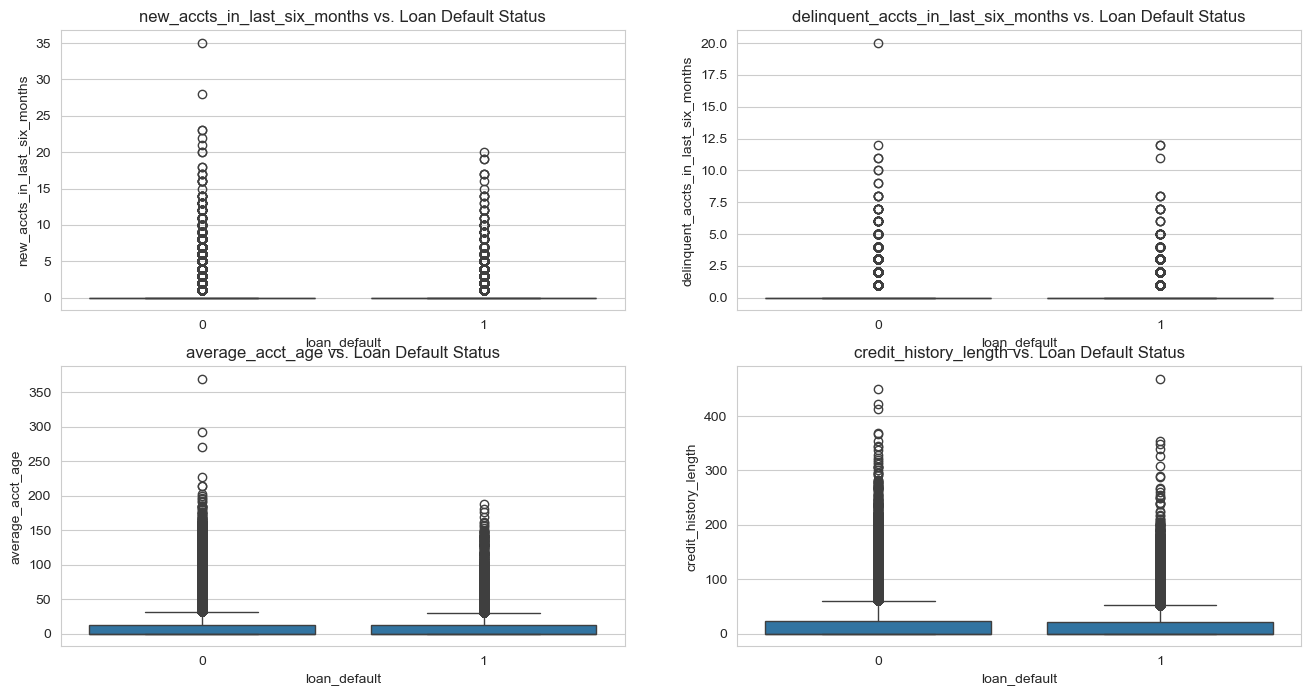

In [242]:

plt.figure(figsize=(16, 8))


credit_history_cols = ['new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'average_acct_age', 'credit_history_length']
for i, col in enumerate(credit_history_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='loan_default', y=col, data=df2)
    plt.title(f'{col} vs. Loan Default Status')

plt.show()


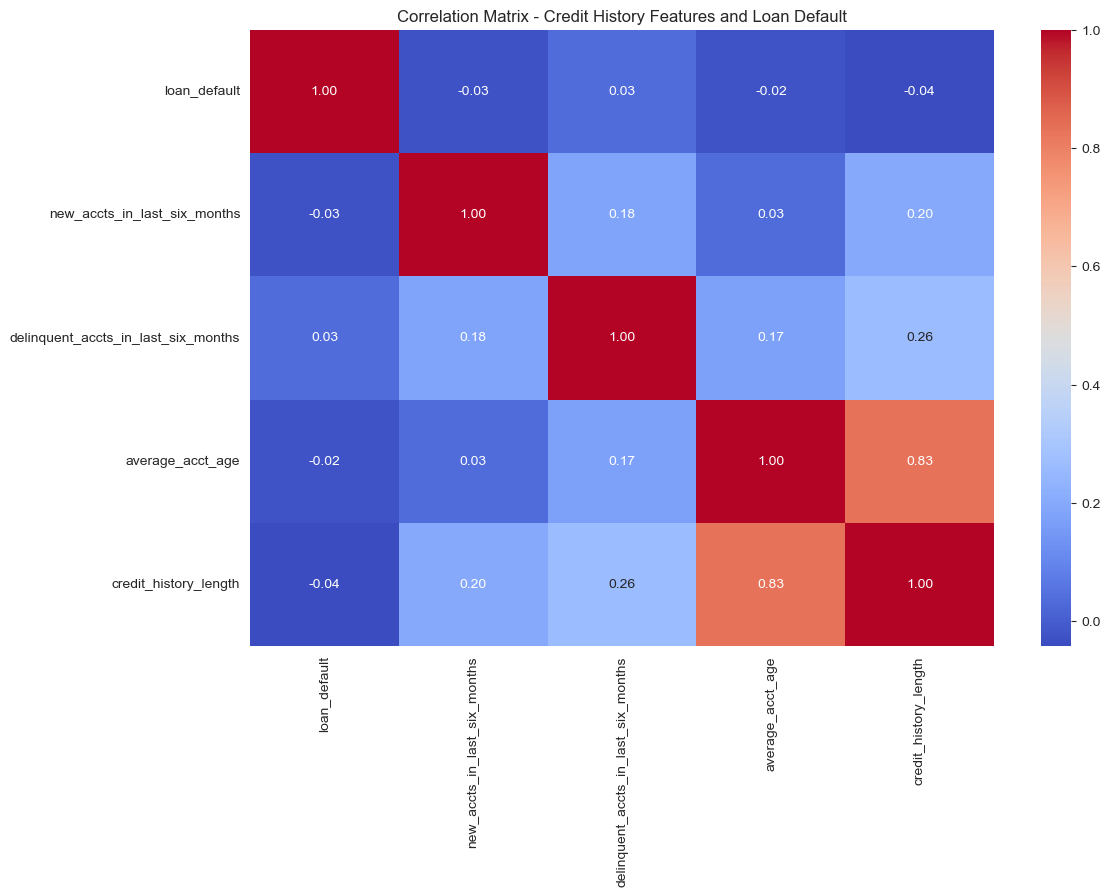

In [243]:
credit_history_cols = ['new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'average_acct_age', 'credit_history_length']

credit_history_features = df2[['loan_default'] + credit_history_cols]


correlation_matrix = credit_history_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Credit History Features and Loan Default')
plt.show()


In [244]:
# logistic_regression

In [245]:
df2.head()

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,disbursal_age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,1,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,41
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,0,2018-09-23,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,1,2018-10-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24


In [246]:
x = df2.drop(columns = ['uniqueid','employee_code_id','loan_default'])
y = df2['loan_default']
print(x.shape)
print(y.shape)

(233154, 39)
(233154,)


In [247]:
x = pd.get_dummies(x,columns = ['perform_cns_score_description'],prefix = 'cns_score',drop_first = True).astype(np.int64)
x

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursaldate,state_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,disbursal_age,cns_score_B-Very Low Risk,cns_score_C-Very Low Risk,cns_score_D-Very Low Risk,cns_score_E-Low Risk,cns_score_F-Low Risk,cns_score_G-Low Risk,cns_score_H-Medium Risk,cns_score_I-Medium Risk,cns_score_J-High Risk,cns_score_K-High Risk,cns_score_L-Very High Risk,cns_score_M-Very High Risk,cns_score_No Bureau History Available,cns_score_Not Scored: More than 50 active Accounts found,cns_score_Not Scored: No Activity seen on the customer (Inactive),cns_score_Not Scored: No Updates available in last 36 months,cns_score_Not Scored: Not Enough Info available on the customer,cns_score_Not Scored: Only a Guarantor,cns_score_Not Scored: Sufficient History Not Available
0,50578,58400,89,67,22807,45,1441,441763200000000000,0,1533254400000000000,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,53278,61360,89,67,22807,45,1497,493689600000000000,1,1533081600000000000,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,52378,60300,88,67,22807,45,1495,250473600000000000,1,1537920000000000000,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,46349,61500,76,67,22807,45,1502,581126400000000000,0,1537660800000000000,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,43594,78256,57,67,22744,86,1499,774144000000000000,1,1538956800000000000,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,57759,76350,77,5,22289,51,3326,374198400000000000,1,1538784000000000000,9,1,1,0,0,0,0,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,28,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
233150,55009,71200,78,138,17408,51,3385,719107200000000000,1,1540944000000000000,9,1,1,0,0,0,0,14,1,1,1,0,464727,464727,0,0,0,0,0,0,15209,0,0,0,17,17,1,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
233151,58513,68000,88,135,23313,45,1797,377568000000000000,1,1540252800000000000,4,1,1,0,0,0,0,11,68,65,1,96524920,105865712,105755712,0,0,0,0,0,0,257948,0,35,5,9,46,1,37,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
233152,22824,40458,61,160,16212,48,96,617846400000000000,1,1534464000000000000,16,1,1,1,0,0,0,11,72,52,1,23286804,33280996,33280996,0,0,0,0,0,0,26046,0,9,1,14,38,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [248]:
x['disbursaldate'] = pd.to_datetime(x['disbursaldate'])
x['date_of_birth'] = pd.to_datetime(x['date_of_birth'])
x['age_at_disbursal'] = (x['disbursaldate'] - x['date_of_birth']).dt.days // 365
x.drop(['disbursaldate', 'date_of_birth'], axis=1, inplace=True)

In [249]:
x.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'current_pincode_id', 'employment_type', 'state_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score', 'pri_no_of_accts',
       'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance',
       'pri_sanctioned_amount', 'pri_disbursed_amount', 'sec_no_of_accts',
       'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance',
       'sec_sanctioned_amount', 'sec_disbursed_amount', 'primary_instal_amt',
       'sec_instal_amt', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'average_acct_age',
       'credit_history_length', 'no_of_inquiries', 'disbursal_age',
       'cns_score_B-Very Low Risk', 'cns_score_C-Very Low Risk',
       'cns_score_D-Very Low Risk', 'cns_score_E-Low Risk',
       'cns_score_F-Low Risk', 'cns_score_G-Low Risk',
       'cns_score_H-Medium R

In [251]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,random_state = 45,test_size= 0.3)

In [253]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [260]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000,random_state = 42)


In [261]:
lr.fit(x_train_sc,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [262]:
y_pred_train = lr.predict(x_train_sc)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [263]:
from sklearn import metrics
print('acc_check :',(metrics.accuracy_score(y_train,y_pred_train)*100).round(2))

acc_check : 78.25


In [277]:
cm1 = metrics.confusion_matrix(y_train,y_pred_train)
cm_df = pd.DataFrame(cm1,index= [0,1],columns = [0,1])
cm_df

,0,1
0,127540,210
1,35282,175


In [266]:
from sklearn.metrics import classification_report
c_report = classification_report(y_train,y_pred_train,target_names = ['default YES','default NO'])
print(c_report)

              precision    recall  f1-score   support

 default YES       0.78      1.00      0.88    127750
  default NO       0.45      0.00      0.01     35457

    accuracy                           0.78    163207
   macro avg       0.62      0.50      0.44    163207
weighted avg       0.71      0.78      0.69    163207



In [267]:
y_pred_test = lr.predict(x_test_sc)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [273]:
from sklearn import metrics
print('acc_chk2 :',(metrics.accuracy_score(y_test,y_pred_test)*100).round(2))

acc_chk2 : 78.33


In [275]:
cm2 = metrics.confusion_matrix(y_test,y_pred_test)
cm_df2 = pd.DataFrame(cm2,columns = [0,1],index = [0,1])
cm_df2

,0,1
0,54692,101
1,15058,96


In [274]:
from sklearn.metrics import classification_report
c_report2 = classification_report(y_test,y_pred_test,target_names = ['default YES','default NO'])
print(c_report2)

              precision    recall  f1-score   support

 default YES       0.78      1.00      0.88     54793
  default NO       0.49      0.01      0.01     15154

    accuracy                           0.78     69947
   macro avg       0.64      0.50      0.45     69947
weighted avg       0.72      0.78      0.69     69947

